<a href="https://colab.research.google.com/github/ImranNust/MISCELLANEOUS/blob/main/LogistRegression_SimpleExampleUsingLoop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# Importing Necessary Packages
---


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

---
# 1. Helper Functions
---

In [11]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-8  # Avoid log(0)
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def compute_gradients(x1, x2, y, y_pred):
    dw1 = np.mean((y_pred - y) * x1)
    dw2 = np.mean((y_pred - y) * x2)
    db = np.mean(y_pred - y)
    return dw1, dw2, db

def plot_decision_boundary(w1, w2, b, x1, x2, y, title, filename=None):
    xx, yy = np.meshgrid(np.linspace(-0.1, 1.1, 100), np.linspace(-0.1, 1.1, 100))
    zz = sigmoid(w1 * xx + w2 * yy + b)

    plt.figure(figsize=(6, 6))
    plt.contourf(xx, yy, zz, levels=[0, 0.5, 1], colors=['#ADD8E6', '#FFA07A'], alpha=0.5)

    plt.scatter(x1[y == 0], x2[y == 0], color='blue', label='Class 0', s=150, edgecolors='black', linewidth=1.5)
    plt.scatter(x1[y == 1], x2[y == 1], color='red', label='Class 1', s=150, edgecolors='black', linewidth=1.5)

    plt.contour(xx, yy, zz, levels=[0.5], colors='black', linestyles='dashed', linewidths=2)
    plt.grid(True, linestyle='--', linewidth=0.5)
    plt.xlabel("x1", fontsize=12, fontweight='bold')
    plt.ylabel("x2", fontsize=12, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend()
    plt.tight_layout()
    if filename:
        plt.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

---
# 2. Input Data: Biometric and Password-Based Security System
---

In [5]:
import pandas as pd

# Input arrays
x1 = np.array([0, 1, 0, 1])
x2 = np.array([0, 0, 1, 1])
y = np.array([0, 0, 0, 1])

# Create DataFrame
df = pd.DataFrame({
    'x1': x1,
    'x2': x2,
    'y': y
})

# Print as a string without index
df

,x1,x2,y
0,0,0,0
1,1,0,0
2,0,1,0
3,1,1,1


---
# 3. Initialization
---

In [12]:
w1, w2, b = 1.5, 0.5, -1  # Initial parameters
alpha = 1.2               # Learning rate
num_iterations = 50
loss_history = []

---
# 4. Plot Before Training
---

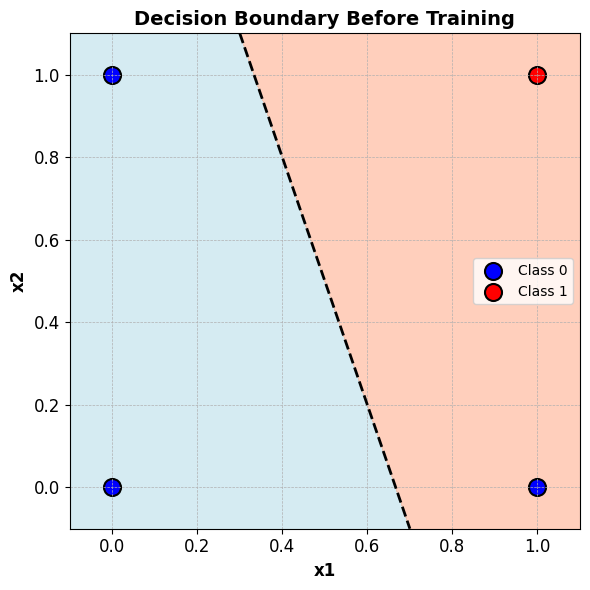

In [13]:
plot_decision_boundary(w1, w2, b, x1, x2, y, "Decision Boundary Before Training")

---
# 5. Training Loop
---

In [14]:
for i in range(num_iterations):
    z = w1 * x1 + w2 * x2 + b
    y_pred = sigmoid(z)
    loss = binary_cross_entropy(y, y_pred)
    loss_history.append(loss)

    dw1, dw2, db = compute_gradients(x1, x2, y, y_pred)

    w1 -= alpha * dw1
    w2 -= alpha * dw2
    b  -= alpha * db

---
# 6. Plot After Training
---

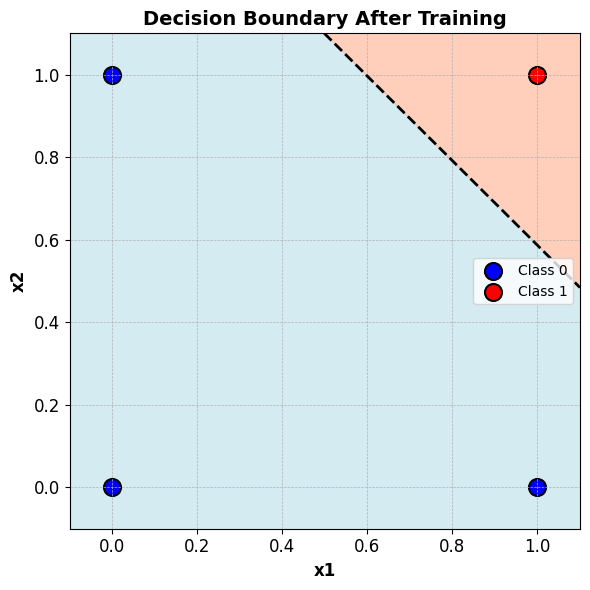

In [15]:
plot_decision_boundary(w1, w2, b, x1, x2, y, "Decision Boundary After Training")

---
# 7. Plot Loss Curve
---

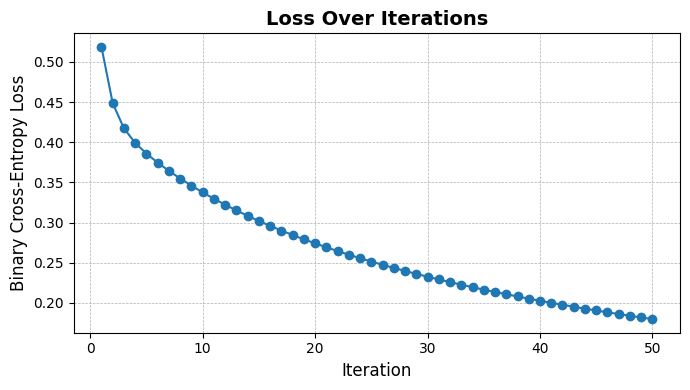

In [16]:
plt.figure(figsize=(7, 4))
plt.plot(range(1, num_iterations + 1), loss_history, marker='o', linestyle='-')
plt.title("Loss Over Iterations", fontsize=14, fontweight='bold')
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Binary Cross-Entropy Loss", fontsize=12)
plt.grid(True, linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()